In [1]:
import numpy as np
from test import test
from util import inverse_decay
import matplotlib.pyplot as plt
import visualize
from stats import *
from agents import *

In [2]:
topics = np.array([[-1, 1]])

In [3]:
outer_varied_param = 'influencer_attention_bound'
outer_varied_param_legend_label = 'Influencer Attention Bound'
outer_varied_param_x_label = 'Influencer Attention Bound'
outer_varied_param_values = list(np.linspace(20, 1000, 10))

In [4]:
inner_varied_param = 'consumer_attention_bound'
inner_varied_param_legend_label = 'Consumer Attention Bound'
inner_varied_param_x_label = 'Consumer Attention Bound'
inner_varied_param_values = list(np.linspace(1, 100, 5))

In [5]:
num_influencers = 1
num_agents = 10

In [6]:
test_imperfect = True

In [7]:
stats = {}
for outer_varied_param_value in outer_varied_param_values:
    perfect_info_stats, imperfect_info_stats = test(
        topics=topics,
        varied_param=inner_varied_param,
        num_influencers=num_influencers,
        num_agents=num_agents,
        producer_topic_interest_func=lambda x: inverse_decay(x, 0.5, 2),
        consumer_topic_interest_func=lambda x: inverse_decay(x, 0.5, 2),
        consumer_attention_bound=inner_varied_param_values,
        consumer_external_interest_prob=3,
        consumer_delay_sensitivity=1,
        influencer_attention_bound=outer_varied_param_value,
        influencer_delay_sensitivity=1,
        init_following_rates_method='equal',
        init_interest_method='even',
        production_rate=1,
        external_production_rate=1,
        use_imperfect_information=test_imperfect,
    )
    stats[outer_varied_param_value] = {
        'perfect': perfect_info_stats,
        'imperfect': imperfect_info_stats
    }

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7


Optimizing consumer 8
Optimizing consumer 9
Optimizing influencer 10
Optimizing producer 0
Optimization succeeded (overall 0.002812707971315831s): nit=3, nfev=8, njev=4.
Optimizing producer 1
Optimization succeeded (overall 0.002260166045743972s): nit=2, nfev=6, njev=3.
Optimizing producer 2
Optimization succeeded (overall 0.0020672499667853117s): nit=2, nfev=6, njev=3.
Optimizing producer 3
Optimization succeeded (overall 0.001415999955497682s): nit=1, nfev=4, njev=2.
Optimizing producer 4
Optimization succeeded (overall 0.000668541993945837s): nit=0, nfev=2, njev=1.
Optimizing producer 5
Optimization succeeded (overall 0.0006308750016614795s): nit=0, nfev=2, njev=1.
Optimizing producer 6
Optimization succeeded (overall 0.0012170840054750443s): nit=1, nfev=4, njev=2.
Optimizing producer 7
Optimization succeeded (overall 0.0017804999952204525s): nit=2, nfev=6, njev=3.
Optimizing producer 8
Optimization succeeded (overall 0.0018279999494552612s): nit=2, nfev=6, njev=3.
Optimizing produc

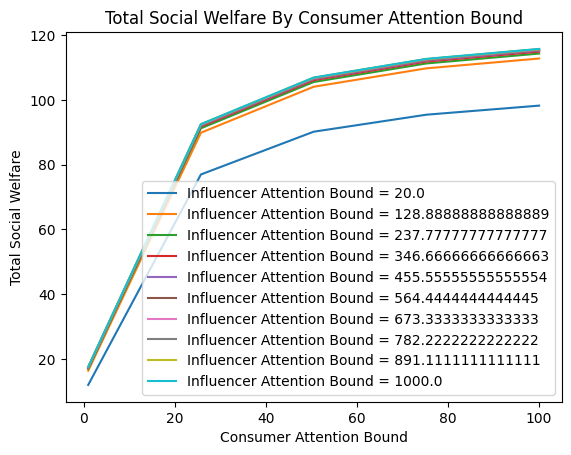

In [8]:
plt.figure()
for outer_varied_param_value in outer_varied_param_values:
    perfect_info_stats: list[TestStats] = stats[outer_varied_param_value]['perfect']
    #imperfect_info_stats = stats[outer_varied_param_value]['imperfect']
    plt.title(f'Total Social Welfare By {inner_varied_param_x_label}')
    plt.xlabel(inner_varied_param_x_label)
    plt.ylabel('Total Social Welfare')
    perfect_social_welfares = [test.total_social_welfare[-1] for test in perfect_info_stats]
    plt.plot(inner_varied_param_values, perfect_social_welfares, label=f'{outer_varied_param_legend_label} = {outer_varied_param_value}')
plt.legend()
plt.show()
    

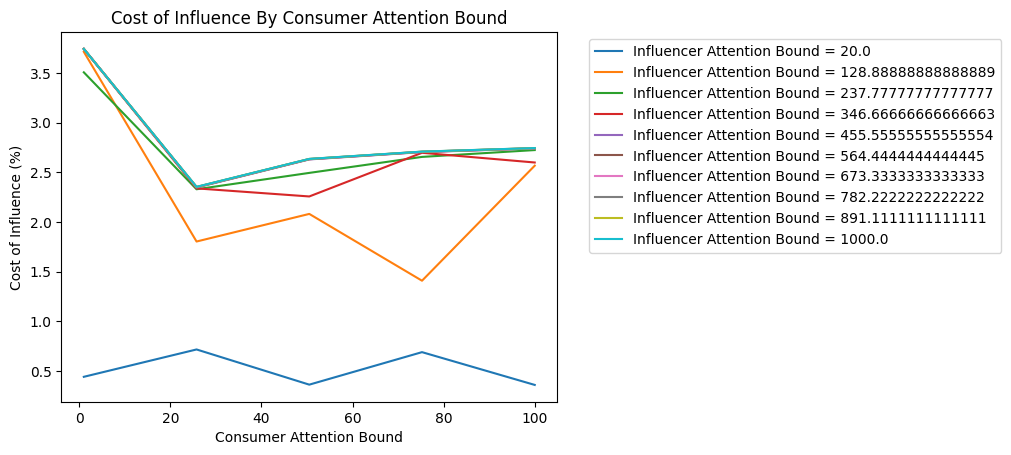

In [15]:
if test_imperfect:
    plt.figure()
    for outer_varied_param_value in outer_varied_param_values:
        perfect_info_stats: list[TestStats] = stats[outer_varied_param_value]['perfect']
        imperfect_info_stats = stats[outer_varied_param_value]['imperfect']
        plt.title(f'Cost of Influence By {inner_varied_param_x_label}')
        plt.xlabel(inner_varied_param_x_label)
        plt.ylabel('Cost of Influence (%)')
        perfect_social_welfares = [test.total_social_welfare[-1] for test in perfect_info_stats]
        imperfect_social_welfares = [test.total_social_welfare[-1] for test in imperfect_info_stats]

        costs_of_influence = [(perfect_social_welfare - imperfect_social_welfare) / perfect_social_welfare * 100 for imperfect_social_welfare, perfect_social_welfare in zip(imperfect_social_welfares, perfect_social_welfares)]
        plt.plot(inner_varied_param_values, costs_of_influence, label=f'{outer_varied_param_legend_label} = {outer_varied_param_value}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    

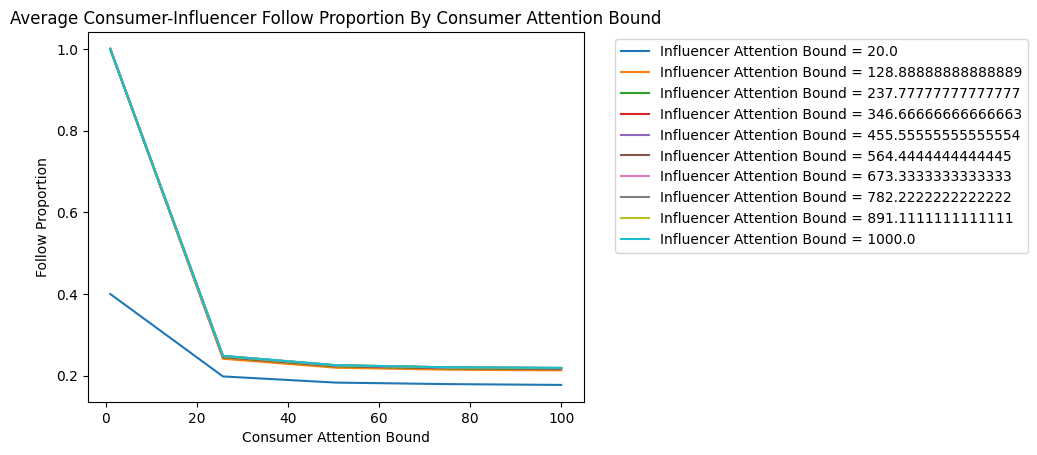

In [16]:
plt.figure()
for outer_varied_param_value in outer_varied_param_values:
    perfect_info_stats: list[TestStats] = stats[outer_varied_param_value]['perfect']
    #imperfect_info_stats = stats[outer_varied_param_value]['imperfect']
    plt.title(f'Average Consumer-Influencer Follow Proportion By {inner_varied_param_x_label}')
    plt.xlabel(inner_varied_param_x_label)
    plt.ylabel('Follow Proportion')
    follow_proportions = [test.average_influencer_follow_proportion[-1] for test in perfect_info_stats]
    plt.plot(inner_varied_param_values, follow_proportions, label=f'{outer_varied_param_legend_label} = {outer_varied_param_value}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
    

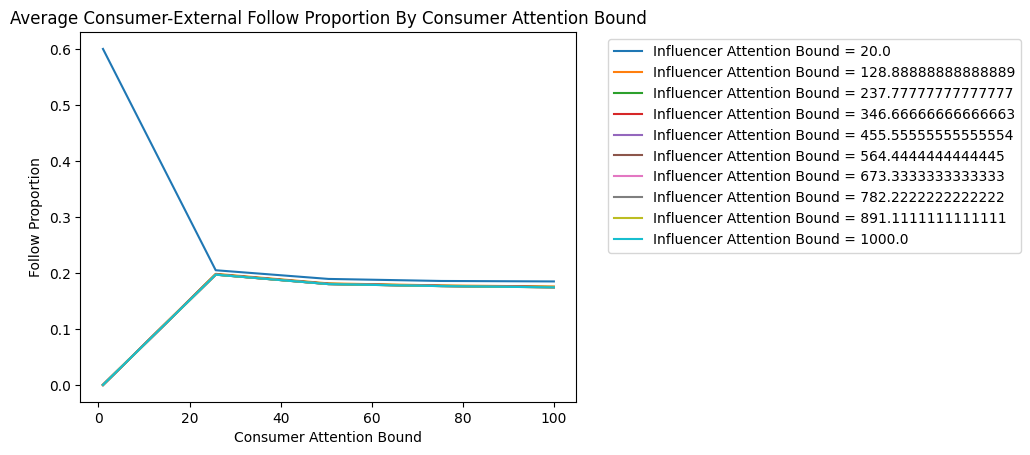

In [17]:
plt.figure()
for outer_varied_param_value in outer_varied_param_values:
    perfect_info_stats: list[TestStats] = stats[outer_varied_param_value]['perfect']
    #imperfect_info_stats = stats[outer_varied_param_value]['imperfect']
    plt.title(f'Average Consumer-External Follow Proportion By {inner_varied_param_x_label}')
    plt.xlabel(inner_varied_param_x_label)
    plt.ylabel('Follow Proportion')
    follow_proportions = [test.average_external_follow_proportion[-1] for test in perfect_info_stats]
    plt.plot(inner_varied_param_values, follow_proportions, label=f'{outer_varied_param_legend_label} = {outer_varied_param_value}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

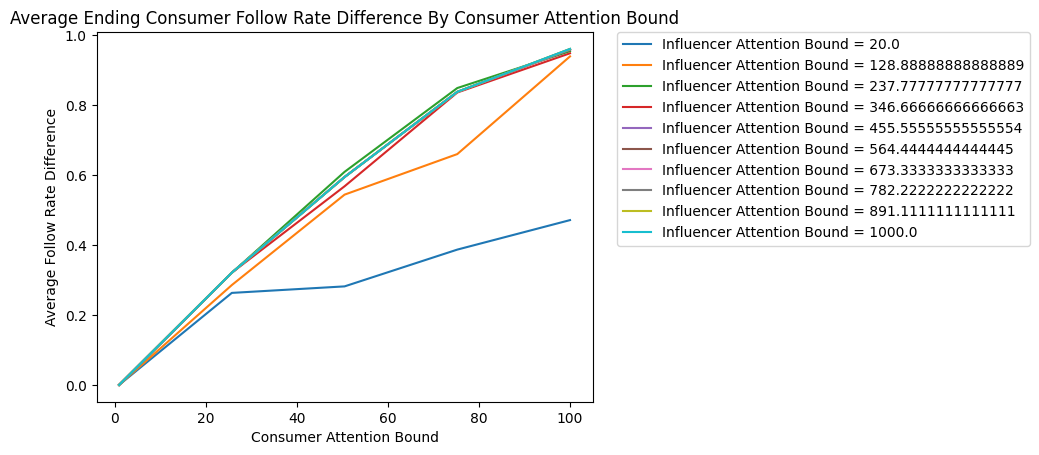

In [12]:
if test_imperfect:
    plt.figure()
    plt.title(f"Average Ending Consumer Follow Rate Difference By {inner_varied_param_x_label}")
    plt.xlabel(inner_varied_param_x_label)
    plt.ylabel("Average Follow Rate Difference")
    for outer_varied_param_value in outer_varied_param_values:
        perfect_info_stats: list[TestStats] = stats[outer_varied_param_value]['perfect']
        imperfect_info_stats = stats[outer_varied_param_value]['imperfect']

        avg_follow_rate_diffs = []

        for i in range(len(perfect_info_stats)):
            perfect_stat: TestStats = perfect_info_stats[i]
            imperfect_stat: TestStats = imperfect_info_stats[i]

            avg_follow_rate_diff = 0

            for index in perfect_stat.consumer_stats:
                perfect_consumer_stat = perfect_stat.consumer_stats[index]
                imperfect_consumer_stat = imperfect_stat.consumer_stats[index]

                ending_follow_rate_diff = np.linalg.norm(perfect_consumer_stat.following_rates[-1] - imperfect_consumer_stat.following_rates[-1])
                avg_follow_rate_diff += ending_follow_rate_diff
            
            avg_follow_rate_diff /= len(perfect_stat.consumer_stats)
            avg_follow_rate_diffs.append(avg_follow_rate_diff)
        
        plt.plot(inner_varied_param_values, avg_follow_rate_diffs, label=f'{outer_varied_param_legend_label} = {outer_varied_param_value}')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

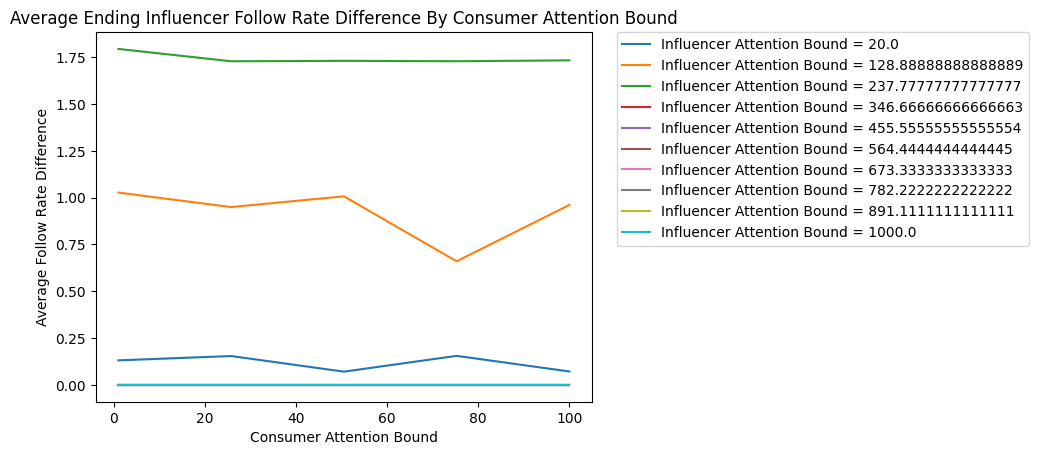

In [13]:
if test_imperfect:
    plt.figure()
    plt.title(f"Average Ending Influencer Follow Rate Difference By {inner_varied_param_x_label}")
    plt.xlabel(inner_varied_param_x_label)
    plt.ylabel("Average Follow Rate Difference")
    for outer_varied_param_value in outer_varied_param_values:
        perfect_info_stats: list[TestStats] = stats[outer_varied_param_value]['perfect']
        imperfect_info_stats = stats[outer_varied_param_value]['imperfect']

        avg_follow_rate_diffs = []

        for i in range(len(perfect_info_stats)):
            perfect_stat: TestStats = perfect_info_stats[i]
            imperfect_stat: TestStats = imperfect_info_stats[i]

            avg_follow_rate_diff = 0

            for index in perfect_stat.influencer_stats:
                perfect_influencer_stat = perfect_stat.influencer_stats[index]
                imperfect_influencer_stat = imperfect_stat.influencer_stats[index]

                ending_follow_rate_diff = np.linalg.norm(perfect_influencer_stat.following_rates[-1] - imperfect_influencer_stat.following_rates[-1])
                avg_follow_rate_diff += ending_follow_rate_diff
            
            avg_follow_rate_diff /= len(perfect_stat.influencer_stats)
            avg_follow_rate_diffs.append(avg_follow_rate_diff)
        
        plt.plot(inner_varied_param_values, avg_follow_rate_diffs, label=f'{outer_varied_param_legend_label} = {outer_varied_param_value}')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

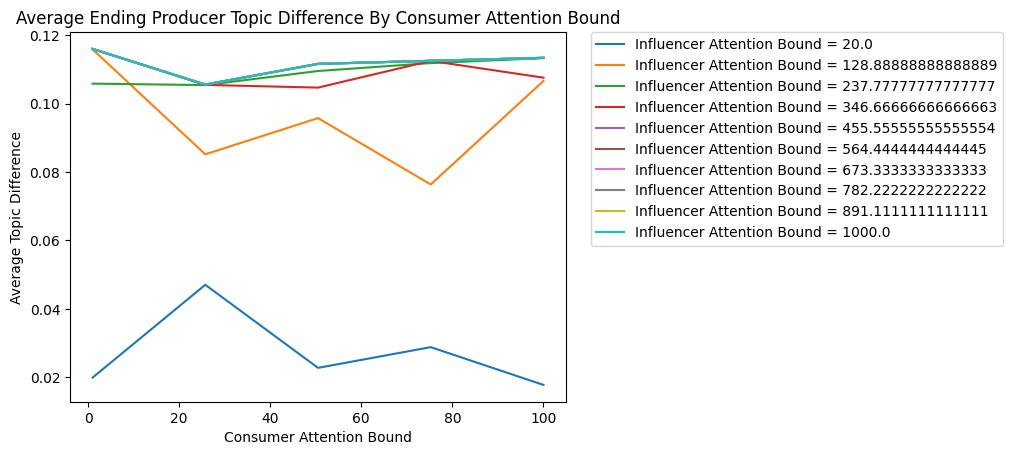

In [14]:
if test_imperfect:
    plt.figure()
    plt.title(f"Average Ending Producer Topic Difference By {inner_varied_param_x_label}")
    plt.xlabel(inner_varied_param_x_label)
    plt.ylabel("Average Topic Difference")
    for outer_varied_param_value in outer_varied_param_values:
        perfect_info_stats: list[TestStats] = stats[outer_varied_param_value]['perfect']
        imperfect_info_stats = stats[outer_varied_param_value]['imperfect']

        avg_topic_diffs = []

        for i in range(len(perfect_info_stats)):
            perfect_stat: TestStats = perfect_info_stats[i]
            imperfect_stat: TestStats = imperfect_info_stats[i]

            avg_topic_diff = 0

            for index in perfect_stat.producer_stats:
                perfect_producer_stat = perfect_stat.producer_stats[index]
                imperfect_producer_stat = imperfect_stat.producer_stats[index]

                ending_topic_diff = np.linalg.norm(perfect_producer_stat.topics[-1] - imperfect_producer_stat.topics[-1])
                avg_topic_diff += ending_topic_diff
            
            avg_topic_diff /= len(perfect_stat.producer_stats)
            avg_topic_diffs.append(avg_topic_diff)
        
        plt.plot(inner_varied_param_values, avg_topic_diffs, label=f'{outer_varied_param_legend_label} = {outer_varied_param_value}')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()